In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Sample text for character prediction
text = "hello world " * 100  # Repeat to create longer text
chars = sorted(list(set(text)))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for c, i in char2idx.items()}

vocab_size = len(chars)
seq_length = 5

# Create input-output pairs
X, y = [], []
for i in range(len(text) - seq_length):
    input_seq = text[i:i + seq_length]
    output_seq = text[i + 1:i + seq_length + 1]
    X.append([char2idx[c] for c in input_seq])
    y.append([char2idx[c] for c in output_seq])

X = np.array(X)
y = np.array(y)


In [ ]:
def build_seq2seq_model(cell_type='RNN', vocab_size=20, input_len=5, units=128):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=input_len))
    if cell_type == 'RNN':
        model.add(SimpleRNN(units, return_sequences=True))
    elif cell_type == 'LSTM':
        model.add(LSTM(units, return_sequences=True))
    elif cell_type == 'GRU':
        model.add(GRU(units, return_sequences=True))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
y = np.expand_dims(y, -1)  # shape (samples, seq_len, 1)


In [ ]:
EPOCHS = 25
BATCH_SIZE = 64

histories = {}
results = {}

for cell in ['RNN', 'LSTM', 'GRU']:
    print(f"\nTraining {cell} model...")
    model = build_seq2seq_model(cell_type=cell, vocab_size=vocab_size, input_len=seq_length)
    history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)
    histories[cell] = history
    results[cell] = model



Training RNN model...
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.6254 - loss: 1.8311 - val_accuracy: 0.9163 - val_loss: 0.8879
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9132 - loss: 0.6815 - val_accuracy: 0.9163 - val_loss: 0.3300
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9217 - loss: 0.2862 - val_accuracy: 0.9331 - val_loss: 0.1979
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9385 - loss: 0.1757 - val_accuracy: 0.9331 - val_loss: 0.1473
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9304 - loss: 0.1411 - val_accuracy: 0.9339 - val_loss: 0.1269
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9308 - loss: 0.1289 - val_accuracy: 0.9339 - val_loss: 0.1181
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9282 - loss: 0.1187 - val_accuracy: 0.9331 - val_loss: 0.1134
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9318 - loss: 0.1136 - val_accuracy: 0.9339 - val_loss: 0.110

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3763 - loss: 2.0445 - val_accuracy: 0.5163 - val_loss: 1.8908
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5383 - loss: 1.7858 - val_accuracy: 0.6326 - val_loss: 1.3267
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6981 - loss: 1.1514 - val_accuracy: 0.8996 - val_loss: 0.6283
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9230 - loss: 0.5133 - val_accuracy: 0.9331 - val_loss: 0.2728
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9348 - loss: 0.2396 - val_accuracy: 0.9331 - val_loss: 0.1688
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9330 - loss: 0.1576 - val_accuracy: 0.9331 - val_loss: 0.1361
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9352 - loss: 0.1327 - val_accuracy: 0.9339 - val_loss: 0.1233
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9301 - loss: 0.1256 - val_accuracy: 0.9339 - val_loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4311 - loss: 2.0181 - val_accuracy: 0.5506 - val_loss: 1.7353
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5712 - loss: 1.5648 - val_accuracy: 0.8678 - val_loss: 0.9372
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.7505 - val_accuracy: 0.9339 - val_loss: 0.3260
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9339 - loss: 0.2708 - val_accuracy: 0.9331 - val_loss: 0.1619
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9396 - loss: 0.1450 - val_accuracy: 0.9331 - val_loss: 0.1258
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9310 - loss: 0.1231 - val_accuracy: 0.9339 - val_loss: 0.1159
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9289 - loss: 0.1146 - val_accuracy: 0.9331 - val_loss: 0.1117
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9358 - loss: 0.1089 - val_accuracy: 0.9339 - val_loss: 0.109

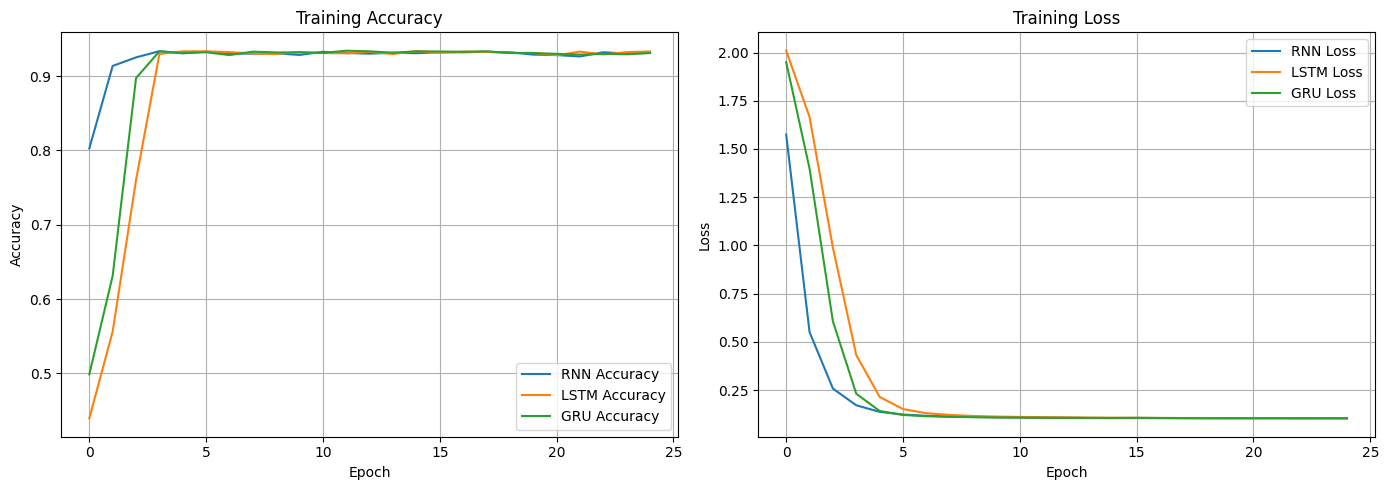

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
for cell in histories:
    plt.plot(histories[cell].history['accuracy'], label=f'{cell} Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
for cell in histories:
    plt.plot(histories[cell].history['loss'], label=f'{cell} Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Training RNN...
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5338 - loss: 0.6904 - val_accuracy: 0.5238 - val_loss: 0.6856 - learning_rate: 0.0010
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6143 - loss: 0.6707 - val_accuracy: 0.5725 - val_loss: 0.6766 - learning_rate: 0.0010
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6650 - loss: 0.6513 - val_accuracy: 0.5975 - val_loss: 0.6659 - learning_rate: 0.0010
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6841 - loss: 0.6323 - val_accuracy: 0.6087 - val_loss: 0.6571 - learning_rate: 0.0010
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7275 - loss: 0.6080 - val_accuracy: 0.6612 - val_loss: 0.6334 - learning_rate: 0.0010
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7664 - loss: 0.5934 - val_accuracy: 0.7250 - val_loss: 0.5982 - learning_rate: 0.0010
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7945 - loss: 0.5542 - val_accuracy: 0.83

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5059 - loss: 0.6928 - val_accuracy: 0.5412 - val_loss: 0.6893 - learning_rate: 0.0010
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6178 - loss: 0.6877 - val_accuracy: 0.6538 - val_loss: 0.6766 - learning_rate: 0.0010
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6065 - loss: 0.6692 - val_accuracy: 0.7050 - val_loss: 0.6309 - learning_rate: 0.0010
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6831 - loss: 0.6098 - val_accuracy: 0.7325 - val_loss: 0.5624 - learning_rate: 0.0010
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7543 - loss: 0.5275 - val_accuracy: 0.7875 - val_loss: 0.5073 - learning_rate: 0.0010
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7823 - loss: 0.4931 - val_accuracy: 0.8163 - val_loss: 0.4722 - learning_rate: 0.0010
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8099 - loss: 0.4524 - val_accuracy: 0.82

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5297 - loss: 0.6898 - val_accuracy: 0.6338 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6669 - loss: 0.6680 - val_accuracy: 0.6538 - val_loss: 0.6359 - learning_rate: 0.0010
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7336 - loss: 0.6116 - val_accuracy: 0.7525 - val_loss: 0.5561 - learning_rate: 0.0010
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8141 - loss: 0.5072 - val_accuracy: 0.8338 - val_loss: 0.4555 - learning_rate: 0.0010
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8637 - loss: 0.4206 - val_accuracy: 0.8600 - val_loss: 0.4020 - learning_rate: 0.0010
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8688 - loss: 0.3756 - val_accuracy: 0.8712 - val_loss: 0.3778 - learning_rate: 0.0010
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8886 - loss: 0.3368 - val_accuracy: 0.89

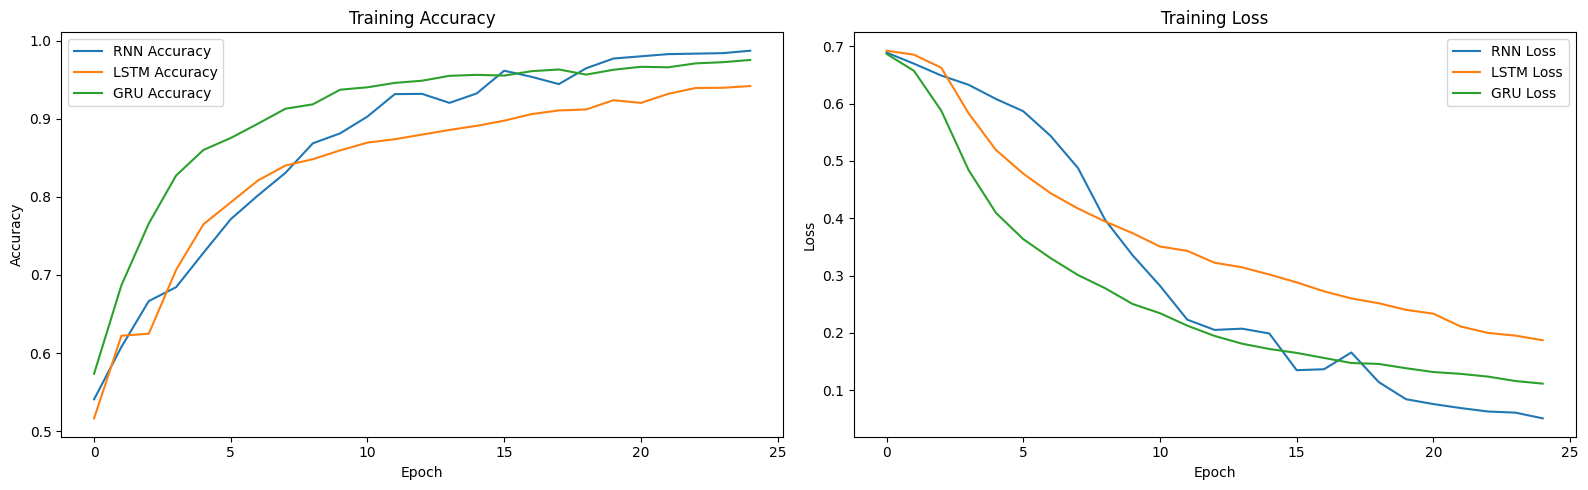

In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, GlobalMaxPooling1D
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Vocabulary setup
vocab = ["<pad>"] + list(string.ascii_lowercase)
vocab_size = len(vocab)
char_to_idx = {c: i for i, c in enumerate(vocab)}

# Palindrome check
def is_palindrome(s):
    return s == s[::-1]

# Data generation
def generate_palindrome_dataset(n=5000, seq_length=21):
    X, y = [], []
    for _ in range(n):
        half_len = seq_length // 2
        if np.random.rand() > 0.5:
            half = [np.random.choice(list(string.ascii_lowercase)) for _ in range(half_len)]
            middle = [np.random.choice(list(string.ascii_lowercase))] if seq_length % 2 else []
            full = half + middle + half[::-1]
            label = 1
        else:
            full = [np.random.choice(list(string.ascii_lowercase)) for _ in range(seq_length)]
            while is_palindrome(full):
                full = [np.random.choice(list(string.ascii_lowercase)) for _ in range(seq_length)]
            label = 0
        X.append([char_to_idx[c] for c in full])
        y.append(label)
    return np.array(X), np.array(y)

# Data preparation
X, y = generate_palindrome_dataset()
X = pad_sequences(X, maxlen=21, padding="post")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Model builder
def build_model(cell_type="RNN"):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=21))
    if cell_type == "RNN":
        model.add(SimpleRNN(64, return_sequences=True))
    elif cell_type == "LSTM":
        model.add(LSTM(64, return_sequences=True))
    elif cell_type == "GRU":
        model.add(GRU(64, return_sequences=True))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Training and evaluation
histories = {}
reports = {}

for cell_type in ["RNN", "LSTM", "GRU"]:
    print(f"\nTraining {cell_type}...")
    model = build_model(cell_type)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=25,
        batch_size=64,
        callbacks=[early_stop, lr_schedule],
        verbose=1
    )
    histories[cell_type] = history
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    reports[cell_type] = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

# Plotting results
def plot_history(histories):
    plt.figure(figsize=(16, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    for k in histories:
        plt.plot(histories[k].history['accuracy'], label=f'{k} Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    for k in histories:
        plt.plot(histories[k].history['loss'], label=f'{k} Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(histories)
